# ESERCIZIO 3

Prima di cominciare ricodate che il comando ```help(•)``` può esserve utilizzato per accedere alla documentazione relativa all'argomento.  
Per esempio, ```help(read.csv)``` ritorna la documentazione relativa al metodo ```read.csv(•)```.  
- ```read.csv(•)``` è il metodo per caricare file csv.
    - il primo argomento è il path al file da caricare.
    - l'argomento sep indica il separatore tra i campi.
    - l'argomento dec indica il separatore per il numeri float.
- ```c(•)``` ritorna il vettore corrispondente all'input.

In [2]:
data <- read.csv("carsharing.csv", sep=";", dec=",", header = TRUE)
print(data[c(1,3,2,4,5,6,7), c(1,2,3,4,5,6)])

  CarIdentifier TimeFrame RushHour PremiumCustomer Distance Time
1           102   FRAME D        1               1      3.0  7.9
3           105   FRAME D        1              -1      0.4  4.1
2           103   FRAME D        1               1      5.3 13.9
4           110   FRAME D        1               1      2.8  5.0
5           110   FRAME B        1              -1      2.7  5.6
6           111   FRAME C        0              -1     11.8 13.2
7           111   FRAME B        1               1      9.3 30.6


Una delle feature più interessanti di R è sicuramente l'advanced indexing.  
Considerate un oggetto, come data, cone righe e colonne.  
Possiamo andare a selezionare gli elementi andando a specificare:
- una sequenza di indici per le righe, possiamo usare ```c(•)```, la notazione ```2:7```, labels ...
- una sequence di indici per le colonne, come per le righe possiamo usare ```c(•)```, la notazione ```2:7```, labels ...  

Se un argomento tra gli indici è lasciato vuoto (per esempio, ```data[c(1,2,3), ]``` ritorna le prime 3 righe e tutte le colonne) implicitamente stiamo intendendo tutti gli elementi.  
Nella cella precedente, per esempio, ho selezionato le righe da 1 a 7 (scambiando la riga 3 con la 2) e le colonne da 1 a 5.


## 3.1. Quanti casi contiene il file?

In [3]:
shape <- dim(data)
nrows <- nrow(data)
ncols <- ncol(data)
cat("the dimesions are:", shape, "\n")
cat("the number of rows are:", nrows, "\n")
cat("the number of columns are:", ncols, "\n")

the dimesions are: 392 6 
the number of rows are: 392 
the number of columns are: 6 


```dim(•)``` è un metodo che ritorna la lunghezza rispetto a tutte le dimensioni dell'oggetto.  
data è costituito da due dimensioni:
- La prima dimensione (righe) ha 392 entry.
- La seconda dimensione (colonne) ha 6 entry.  

Ovviamente, il discore vare anche per array con più di due dimensioni.  
```ncol(•)``` ritorna il numero di colonne.  
```nrow(•)``` ritorna il numero di righe.  
```length(•)``` ritorna il numero di elementi per gli oggetti con una sola dimensione.

## 3.2. Analizziamo l’utilizzo del servizio di car sharing nelle diverse fasce orarie (carattereTimeFrame) e negli orari di maggior o minor traffico (carattereRushHour)
### 3.2.1. Il carattereTimeFrame è nominale, ordinale o scalare? Giustificate la risposta.

In [4]:
print(data[c(1:5), c("CarIdentifier", "TimeFrame")])

  CarIdentifier TimeFrame
1           102   FRAME D
2           103   FRAME D
3           105   FRAME D
4           110   FRAME D
5           110   FRAME B


TimeFrame ha carattere nominale in quanto non può essere stabilito un ordinamento tra i suoi valori.
### 3.2.2. In quante fasce orarie è stata suddivisa una giornata?

In [5]:
fasce_freq <- table(data[,c("TimeFrame")])
print(fasce_freq)
cat("n.fasce:",length(fasce_freq))


FRAME A FRAME B FRAME C FRAME D FRAME E 
     47     123     107      94      21 
n.fasce: 5

```table(•)``` dato un vettore con 1 dimensione, conta la frequenza assoluta di ogni differente entry.  
```table(•)``` dato un vettore con 2 dimensioni, conta la frequenza assoluta di ogni possibile coppia.  
```table(•)``` dato un vettore con 3 dimensioni, conta la frequenza assoluta di ogni possibile tripla. 
### 3.2.3 In quali fasce orarie il servizio di car sharing è stato maggiormente utilizzato?

In [30]:
sorted_fasce_freq <- sort(fasce_freq, decreasing=TRUE)
print(sorted_fasce_freq[1])

FRAME B 
    123 


```sort(•)``` si occupa di ritornare l'oggetto ordinato.
### 3.2.4. Calcolate la tabella delle frequenze congiunte di TimeFrame e RushHour.

In [7]:
contingency <- table(data[,c("TimeFrame","RushHour")])
print(contingency)

         RushHour
TimeFrame   0   1
  FRAME A  47   0
  FRAME B   0 123
  FRAME C 107   0
  FRAME D   0  94
  FRAME E  21   0


### 3.2.5. Leggendo la tabella calcolata al punto precedente determinate quali sono le fasce orarie che corrispondono all’ora di punta.

In [8]:
unique(data[data$RushHour == 1,c("TimeFrame")])

[1] FRAME D FRAME B
Levels: FRAME A FRAME B FRAME C FRAME D FRAME E

Dalla soluzione dell'esercizio 2.4 è chiaro che FRAME B e FRAME D sono quelli relativi alla RushHour.  
Tuttavia, possiamo ottenere la soluzione anche in un secondo modo.
Con la sintassi ```data[data$RushHour == 1,c("TimeFrame")]``` intendo:
- ```data$;RushHour == 1```: seleziona tutte le righe che hanno il campo RushHour = 1.
- ```c("TimeFrame")```: la colonna TimeFrame.  

Infine, attraverso ```unique(•)``` possiamo ottenere tutti gli elementi che appaiono almeno una volta.

## 3.3. Consideriamo, solo in questo punto dell’esercizio, i clienti che hanno aderito al programma Premium (Premium=1)
### 3.3.1. Quanti sono?

In [9]:
nrow(data[data$PremiumCustomer == 1,])

[1] 227

### 3.3.2. Calcolate la distanza media percorsa in un tragitto da un cliente che ha aderito al programma Premium.

In [10]:
mean(data[data$PremiumCustomer == 1,"Distance"])

[1] 8.437445

``` mean(•)``` ritorna la media dell'argomento.

## 3.4. Ritorniamo a considerare il dataset completo e studiamo la distanza percorsa in ciascunutilizzo del servizio (carattereDistance).
### 3.4.1. Il carattere Distance è nominale, ordinale o scalare? Giustificate la risposta.
La distanza può assumere valori in &#x211d; (è una variabile quantitative continua), quindi scalare.
### 3.4.2. Tracciate il boxplot di tale carattere.

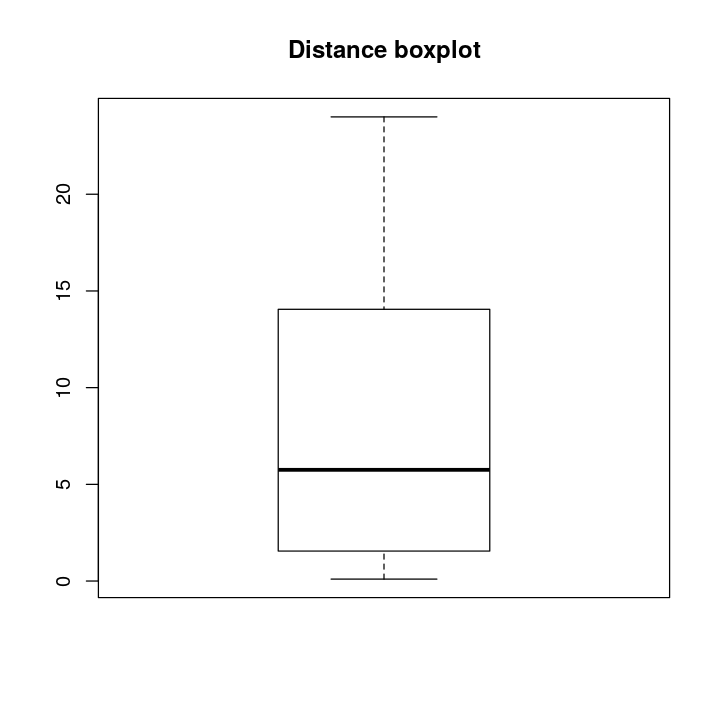

In [33]:
boxplot(data$Distance, main = "Distance boxplot", plot=TRUE)

### 3.4.3. In base all’aspetto del grafico ottenuto al punto precedente, determinate quali sono gli indici di centralità e di dispersione che meglio caratterizzano la distanza percorsa, calcolandone il valore.

In [12]:
cat("max:    ", max(data$Distance), "\n")
cat("q1:     ", quantile(data$Distance, 0.25), "\n")
cat("median: ", median(data$Distance), "\n")
cat("q2:     ", quantile(data$Distance, 0.50), "\n")
cat("q3:     ", quantile(data$Distance, 0.75), "\n")
cat("min:    ", min(data$Distance), "\n")
cat("IQR:    ", quantile(data$Distance, 0.75)-quantile(data$Distance, 0.25),"\n")
cat("IQR:    ", IQR(data$Distance), "\n")

max:     24 
q1:      1.575 
median:  5.75 
q2:      5.75 
q3:      14.025 
min:     0.1 
IQR:     12.45 
IQR:     12.45 


### 3.4.4. Riscontrate una relazione tra la distanza percorsa e il Tempo? In caso affermativo, caratterizzate tale relazione. In ogni caso giustificate la vostra risposta mostrando un grafico.

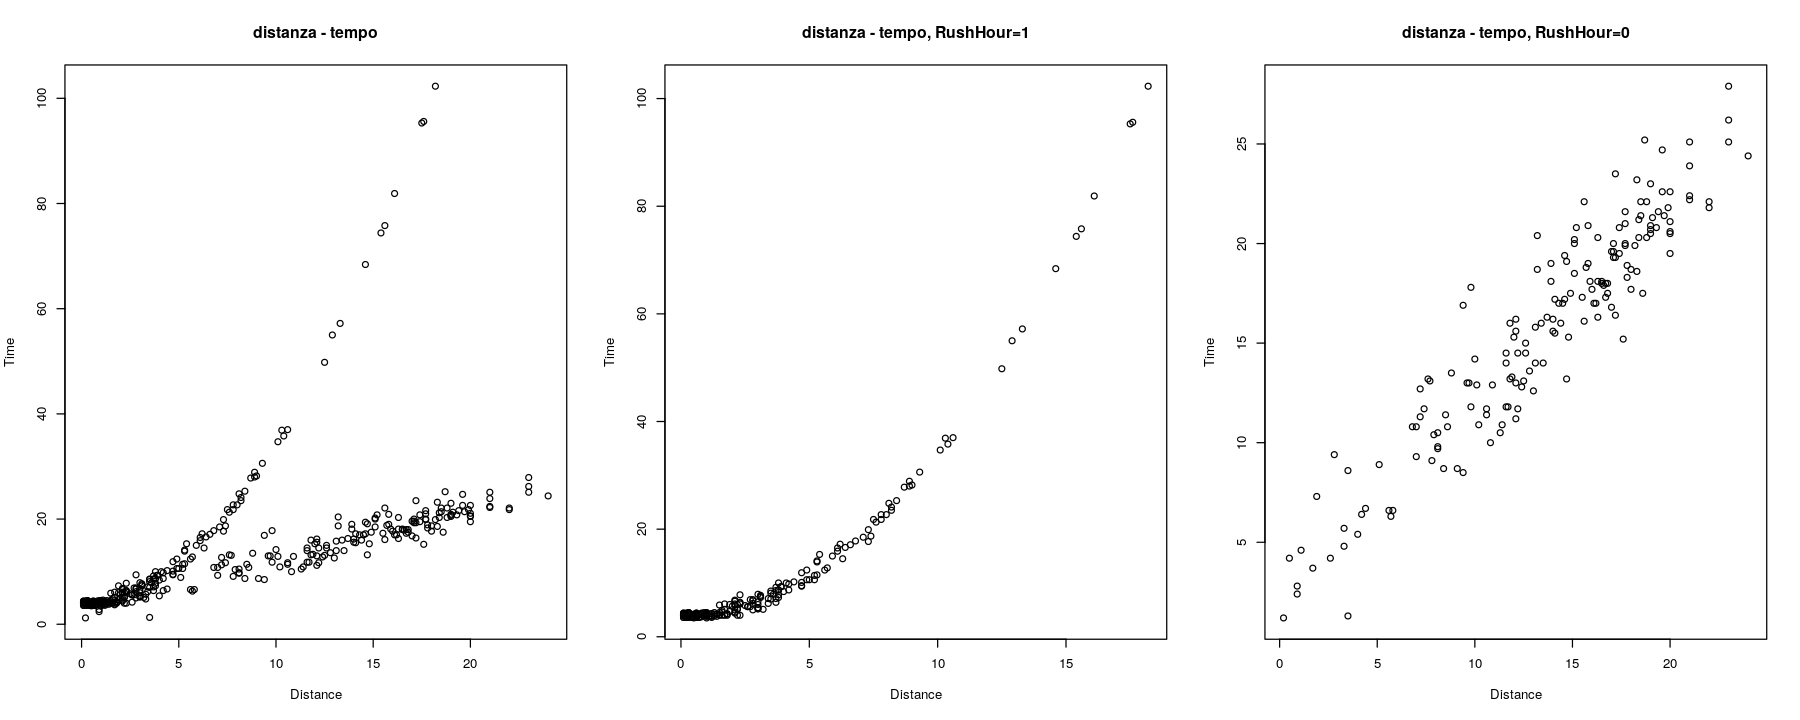

In [13]:
library(repr)
layout(matrix(1:3, 1, 3, byrow = TRUE))
options(repr.plot.width = 15, repr.plot.height=6)
plot(data[, c("Distance", "Time")], main="distanza - tempo")
plot(data[data$RushHour == 1, c("Distance", "Time")], main = "distanza - tempo, RushHour=1")
plot(data[data$RushHour == 0, c("Distance", "Time")], main = "distanza - tempo, RushHour=0")

Per brevi distanze l'andamento è il medesimo.  
Su distanze più lunghe si denotano due andamenti differenti.
La RushHour sembra essere responsabile delle differenze.

### 3.4.5. Calcolate l’indice di correlazione tra la distanza e Tempo.  Il valore ottenutosupporta la risposta che avete dato al punto precedente?

In [14]:
cor(data[,c("Distance", "Time")])

,Distance,Time
Distance,1.0000000,0.6273992
Time,0.6273992,1.0000000


la correlazione indica che al crescere di ```Distance``` la ```Time``` cresce, come è ragionevole che sia.  
### 3.4.6. Tracciate, possibilmente nella stessa figura, il box plot della distanza nel caso di utilizzo dell’auto in orario di punta (RushHour=1) e in orario non di punta (Rush-Hour=0).

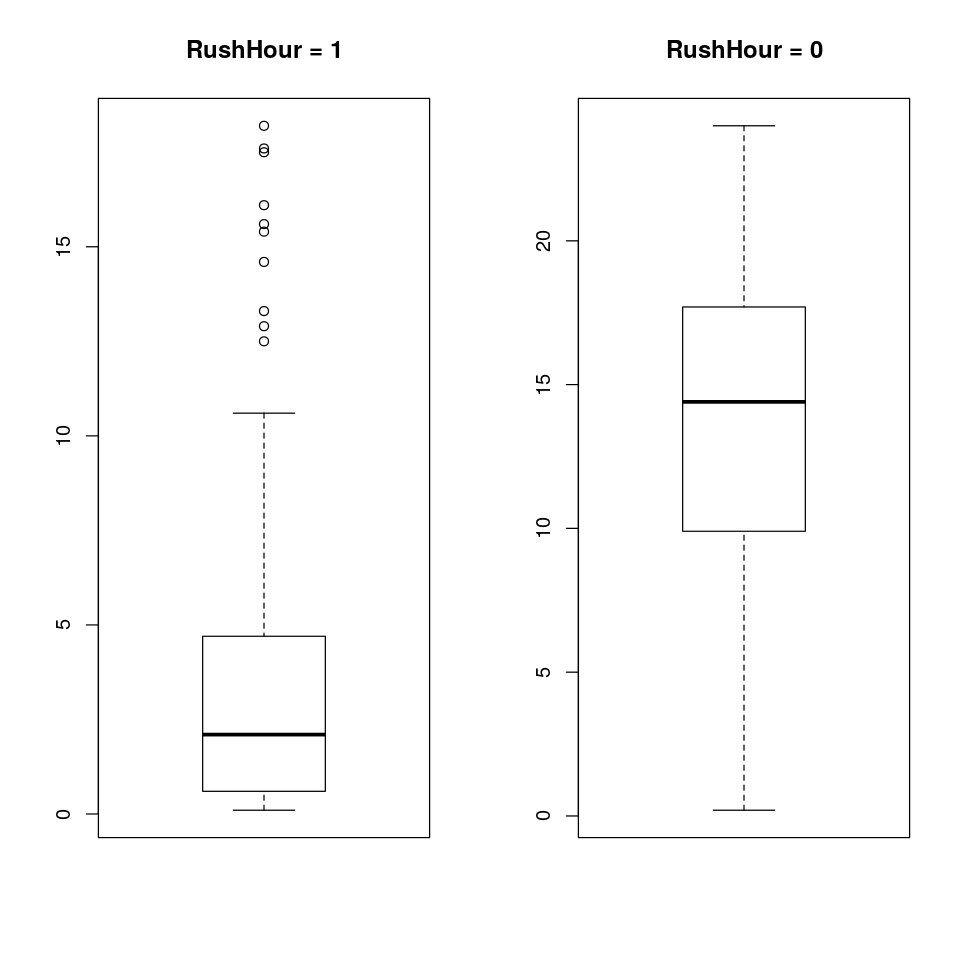

In [36]:
layout(matrix(1:2, 1, 2, byrow = TRUE))
options(repr.plot.width = 8, repr.plot.height = 8)
boxplot(data[data$RushHour == 1,"Distance"], main = "RushHour = 1")
boxplot(data[data$RushHour == 0,"Distance"], main = "RushHour = 0")

### 3.4.7. Ispezionando i due grafici ottenuti al punto precedente, dite se negli orari di puntasono privilegiati spostamenti "più brevi" oppure "più lunghi" rispetto agli orari non di punta, giustificando la risposta.

Dal precedente grafico si può notare che:  
- quando ```RushHour=1``` il 50% degli spostamenti è "più breve", tra 0 e 5.  
- quando ```RushHour=0``` il 50% degli spostamenti è "più lungo", tra 10 e 20.
- dall'istogramma si nota anche che la distanza presenta una distribuzione bimodale, dove, le due mode corrispondono con i picchi delle distribuzioni quando la ```RushHour=0``` e quando ```RushHour=1```.

Di conseguenza, durante gli orari di punta sono privilegiati spostamenti brevi. 

### 3.4.8. Tracciate, possibilmente nella stessa figura, il box plot della distanza nel caso di utilizzo dell’auto da parte dei clienti che hanno aderito al programma Premium (Premium=1) e di quelli che non vi hanno aderito (Premium=-1).

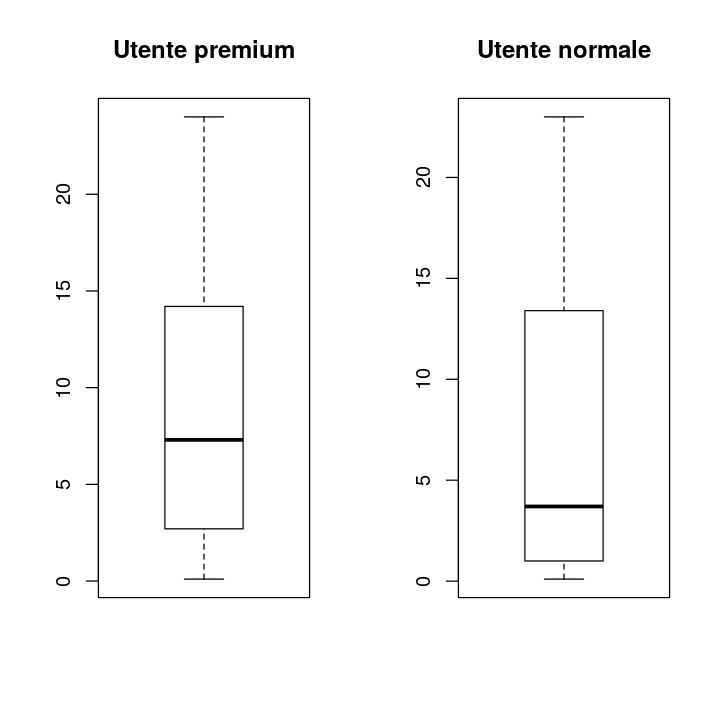

In [16]:
layout(matrix(1:2, 1, 2, byrow = TRUE))
options(repr.plot.width = 6, repr.plot.height = 6)
boxplot(data[data$PremiumCustomer == 1 ,"Distance"], main="Utente premium")
boxplot(data[data$PremiumCustomer == -1,"Distance"], main="Utente normale")

## 3.4.9. Ispezionando i due grafici ottenuti al punto precedente, notate una grossa differenzanelle distanze percorse dai clienti dei due gruppi?

Gli utenti premium tendono a percorerre distanze più lunghe rispetto agli utenti normali.

### 3.4.10. In Figura 1 è mostrato l’istogramma della distanza percorsa. In tale grafico si può individuare la presenza di due gruppi abbastanza distinti. I due gruppi sono relativi al tipo di cliente (Premium=1 oppure Premium=-1) oppure all’orario di utilizzo del veicolo (RushHour=1 oppure RushHour=0)? In altri termini, la distanza percorsa dipende dal fatto che l’utente sia un cliente Premium/non-Premium oppure dal fatto che l’utilizzo è avvenuto in orario Rush/non-Rush? Suggerimento: per rispondere a questa domanda basta ispezionarei boxplot prodotti nei punti precedenti di questo esercizio.

c'è un differenza nella distanza percorsa se l'utente è premium e non-premium.  
c'è un differenza nella distanza percorsa se l'utente sia nella RushHour e non-RushHour.  
nel secondo caso la differenza è più marcata e responsabile delle 2 mode nell'istogramma della distanza.

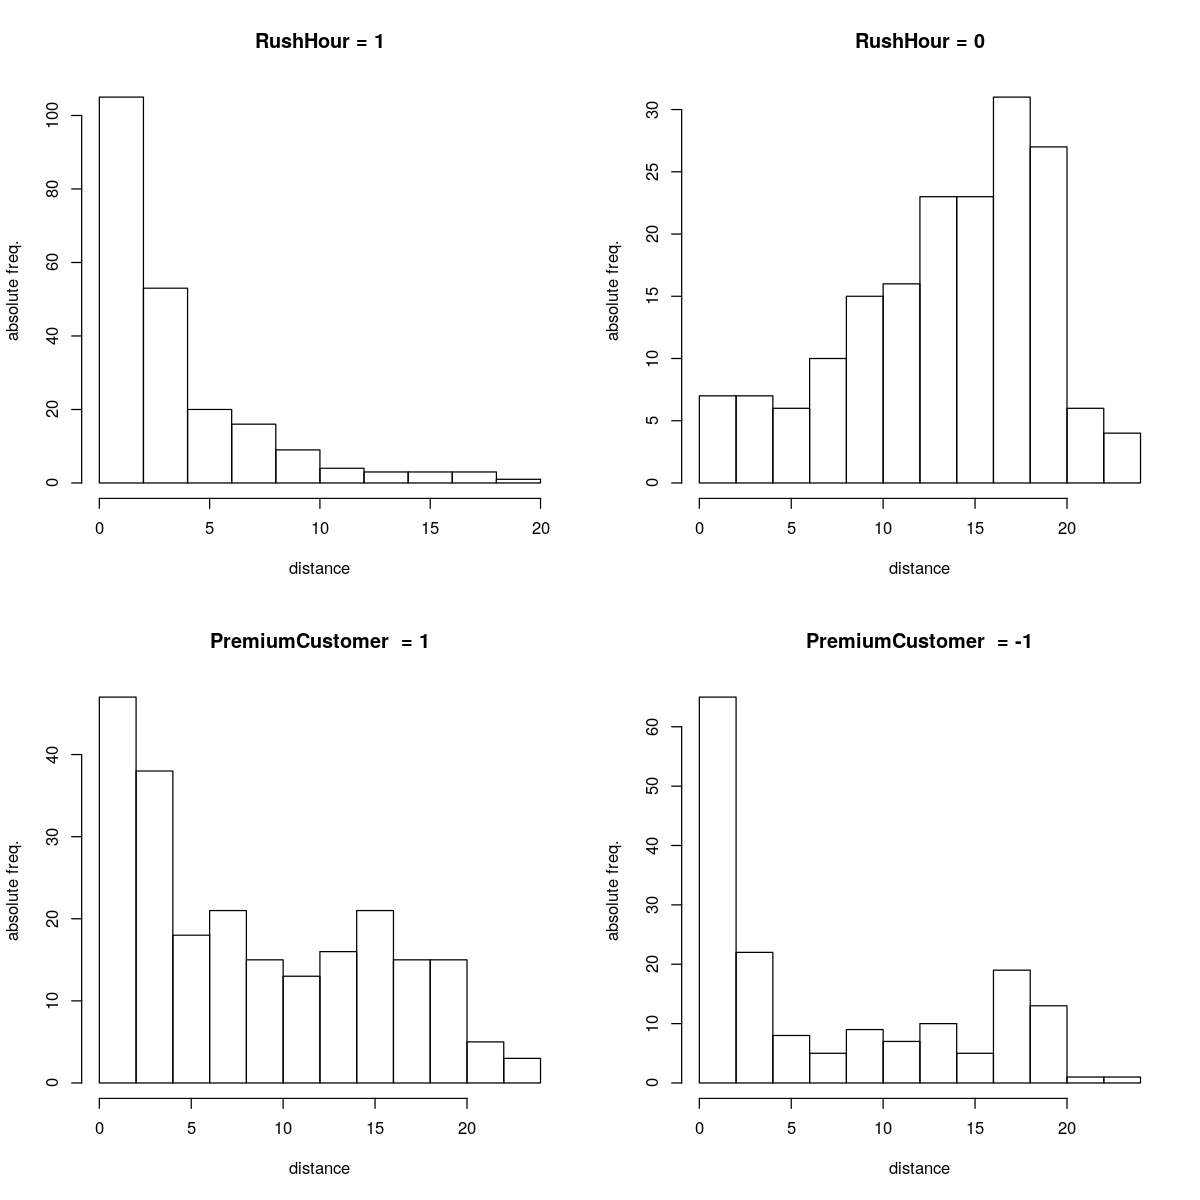

In [17]:
layout(matrix(1:4, 2, 2, byrow = TRUE))
options(repr.plot.width = 10, repr.plot.height = 10)
hist(data[data$RushHour == 1 , c("Distance")], main="RushHour = 1" , xlab="distance", ylab="absolute freq.")
hist(data[data$RushHour == 0 , c("Distance")], main="RushHour = 0" , xlab="distance", ylab="absolute freq.")
hist(data[data$PremiumCustomer  == 1 , c("Distance")], main="PremiumCustomer  = 1" , xlab="distance", ylab="absolute freq.")
hist(data[data$PremiumCustomer  == -1, c("Distance")], main="PremiumCustomer  = -1", xlab="distance", ylab="absolute freq.")


Questi 4 grafici evidenziano quello che è già stato notato.
### 3.4.11. Calcolate la distanza media nei due gruppi di orario (di punta/non di punta) e commentate l’istogramma di Figura 1 utilizzando queste due informazioni.

In [18]:
cat("media in orario di punta    :", mean(data[data$RushHour == 1, "Distance"]), "\n")
cat("media in orario di non punta:", mean(data[data$RushHour == 0, "Distance"]), "\n")

media in orario di punta    : 3.319355 
media in orario di non punta: 13.48743 


In orario di punta si tende a percerrere distanze brevi, come avevamo già notato.
### 3.4.12. Sempre in riferimento ai due gruppi di orario (di punta/non di punta), calcolate la varianza within groups e la varianza between groups

In [38]:
group1 <- data[data$RushHour == 0, "Distance"]
group2 <- data[data$RushHour == 1, "Distance"]

size        <- length(data$Distance)
size_group1 <- length(group1)
size_group2 <- length(group2)

mean        <- mean(data$Distance)
mean_group1 <- mean(group1)
mean_group2 <- mean(group2)

var        <- var(data$Distance)
var_group1 <- var(group1)
var_group2 <- var(group2)

variance_within_groups  <- (size_group1/size)*var_group1 + (size_group2/size)*var_group2
variance_between_groups <- (size_group1/size)*(mean_group1-mean)^2 + (size_group2/size)*(mean_group2-mean)^2

cat("variance within  groups:", variance_within_groups, "\n")
cat("variance between groups:", variance_between_groups, "\n")

variance within  groups: 20.75099 
variance between groups: 25.55071 


# Esercizio 4
## 4.1. Tracciate un grafico rappresentativo della distribuzione della distanza percorsa negli oraridi punta

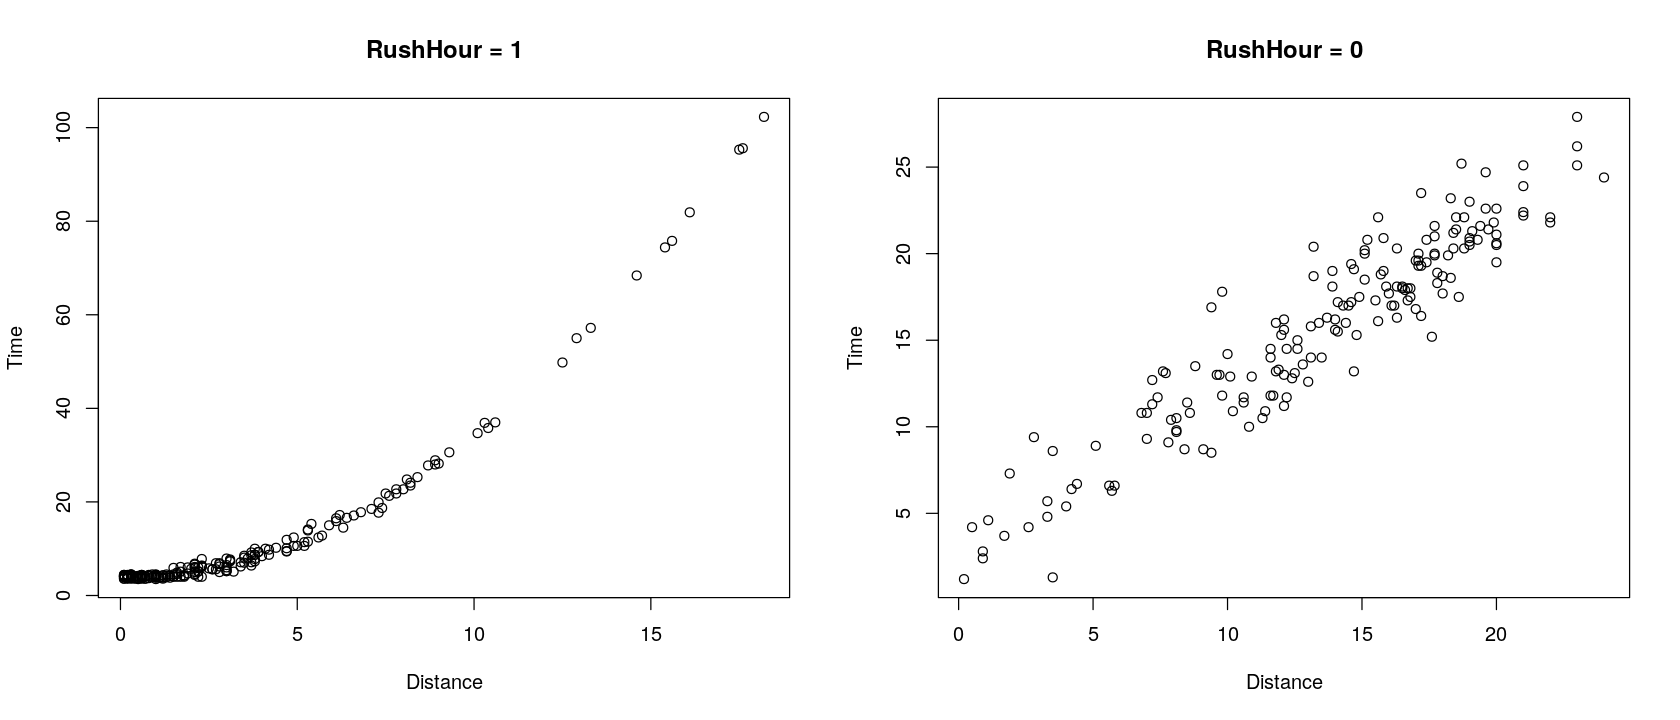

In [20]:
layout(matrix(1:2, 1, 2, byrow = TRUE))
options(repr.plot.width = 14, repr.plot.height = 6)
plot(data[data$RushHour == 1,c("Distance","Time")], main="RushHour = 1")
plot(data[data$RushHour == 0,c("Distance","Time")], main="RushHour = 0")

In ore normali la crescità sembra lineare.  
Durante la RushHour la crescità è maggiore.
## 4.2. È plausibile affermare che negli orari di punta la distanza segue una legge normale? Giustificate la risposta.

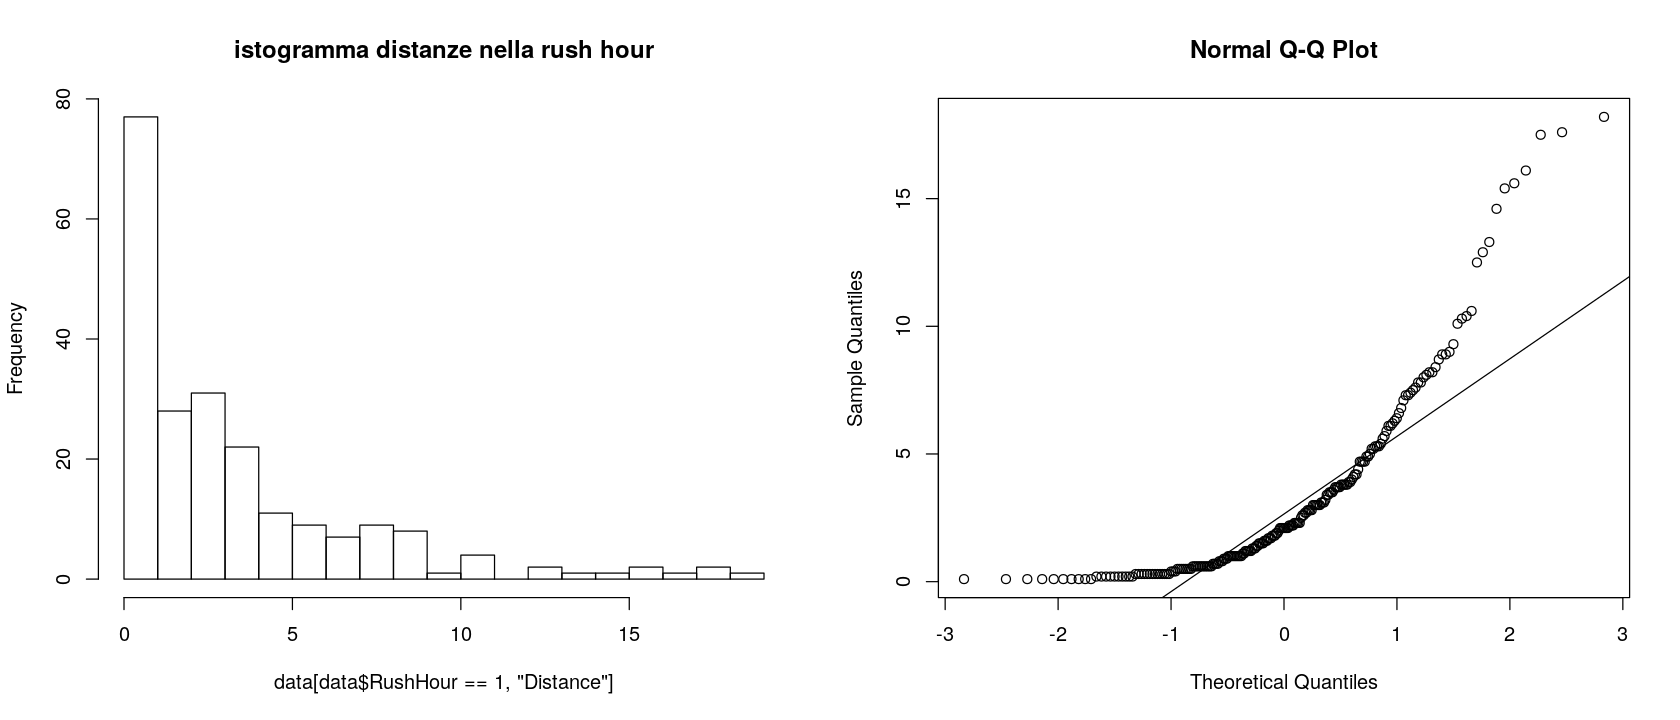

In [21]:
layout(matrix(1:2, 1, 2, byrow = TRUE))
options(repr.plot.width = 14, repr.plot.height = 6)

hist(data[data$RushHour == 1, "Distance"], breaks=25, main="istogramma distanze nella rush hour")

qqnorm(data[data$RushHour == 1, "Distance"])
qqline(data[data$RushHour == 1, "Distance"])

La distribuzione delle distanze sembra più essere esponenziale.
## 4.3. Calcolate la media e la deviazione standard della distanza negli orari di punta.

In [22]:
mean    <- mean(data[data$RushHour == 1, "Distance"])
std_dev <- sd(data[data$RushHour == 1, "Distance"])

cat("mean              :",mean,"\n")
cat("standard deviation:",std_dev,"\n")

mean              : 3.319355 
standard deviation: 3.711106 


# ESERCIZIO 5
Concentriamoci ora sulla distanza percorsa dai veicoli negli orari non di punta.
## 5.1. Tracciate un grafico opportuno che descriva la distanza percorsa negli orari non di punta.

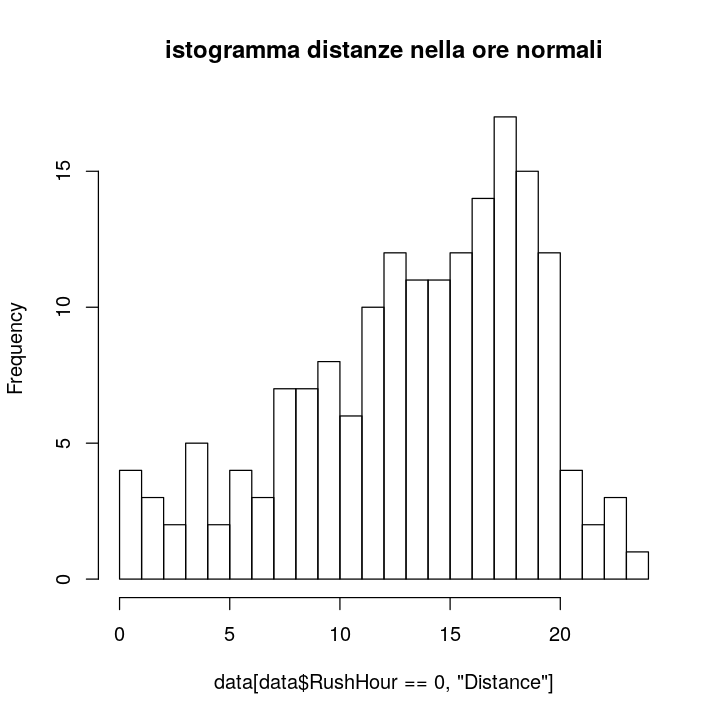

In [23]:
options(repr.plot.width=6, repr.plot.height=6)
hist(data[data$RushHour == 0, "Distance"], breaks=25, main="istogramma distanze nella ore normali")

## 5.2. È plausibile affermare che negli orari non di punta la distanza segue una legge normale? Giustificate la risposta.

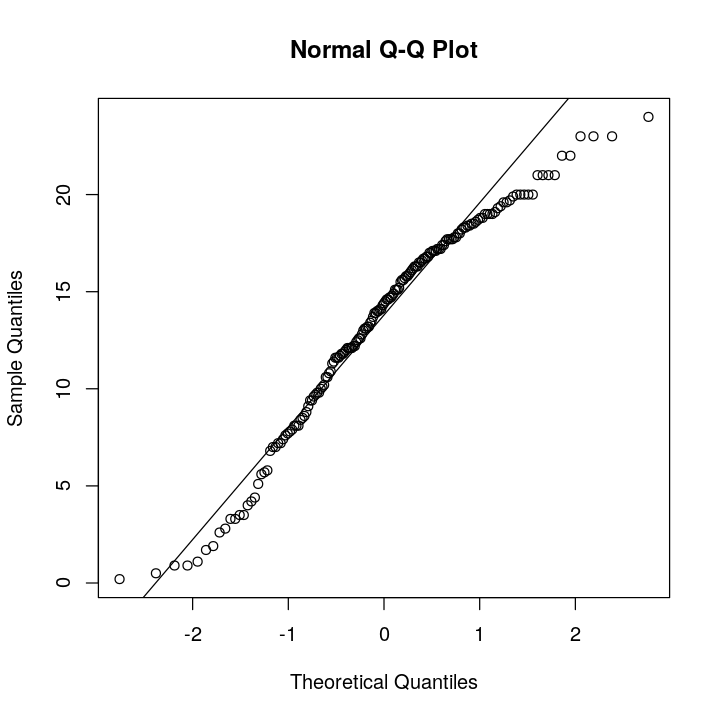

In [24]:
options(repr.plot.width=6, repr.plot.height=6)
qqnorm(data[data$RushHour == 0, "Distance"])
qqline(data[data$RushHour == 0, "Distance"])

ci si avvicina, ma non si direbbe.

# Esercizio 6
Selezionate in una variabile chiamata ```tragitti_brevi``` tutti i casi in cui il veicolo è stato utilizzato per percorrere un tragitto breve, cioè di lunghezza inferiore a 1.5 km.
## 6.1. Tracciate il grafico di dispersione della distanza e del tempo per i tragitti brevi.

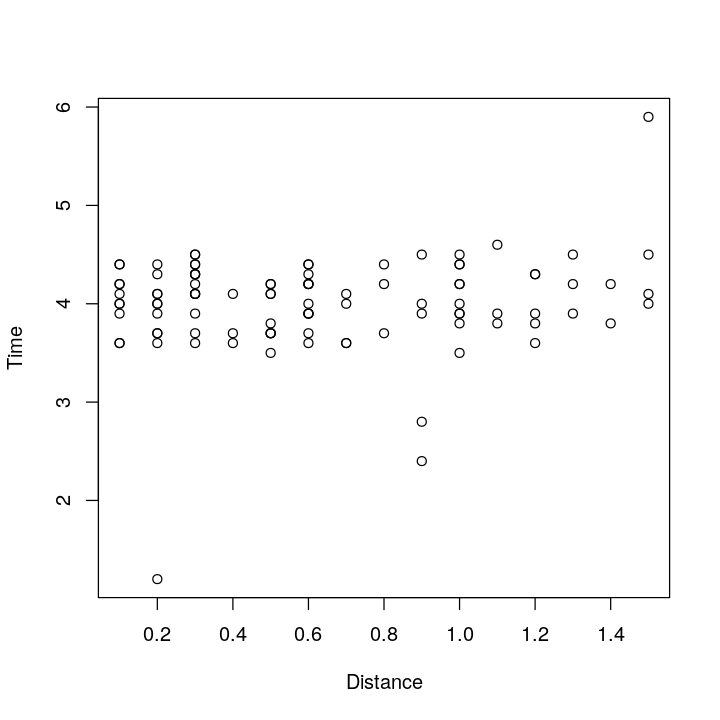

In [25]:
tragitti_brevi <- data[data$Distance <= 1.5, ]
options(repr.plot.width=6, repr.plot.height=6)
plot(tragitti_brevi[, c("Distance","Time")])

## 6.2. Commentate il grafico che avete tracciato al punto precedente, possibilmente collegandolo al valore assunto dall’indice di variazione per il carattere Time.

In [26]:
mean_Time <- mean(tragitti_brevi$Time)
sd_Time  <- sd(tragitti_brevi$Time)
coeff_var <- sd_Time/abs(mean_Time)
cat("coefficiente variazione  :",coeff_var,"\n")
cat("coefficiente correlazione:",cor(tragitti_brevi$Distance, tragitti_brevi$Time),"\n")

coefficiente variazione  : 0.1223057 
coefficiente correlazione: 0.1457595 


Il tempo per tragitti brevi è praticamente costante.  
Questo lo si riscontra anche nel coefficiente di variazione che assume un valore particolarmente basso.  
Lo stesso è confermato dall'indice di correlazione tra ```Distance``` e ```Time```